# Diabetes Prediction Project Using Machine Learning

### Description: 

The objective of this project is to predict whether or not a patient is suffering from Diabetes. The dataset consists of several independent/ predictor variables and a dependent/ target variable.

### Predictor variables:  

Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

### Target variable: 

Outcome

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

### Loading the Dataset

In [2]:
diab_data = pd.read_csv("C:/Users/aksha/Downloads/AD Projects/archive/diabetes.csv")

### Exploratory Data Analysis (EDA)

In [3]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2299,10,101,76,48,180,32.9,0.171,63,0
2300,2,122,70,27,0,36.8,0.340,27,0
2301,5,121,72,23,112,26.2,0.245,30,0
2302,1,126,60,0,0,30.1,0.349,47,1
2303,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# diab_data.sample(n=10)
diab_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2100,0,91,80,0,0,32.4,0.601,27,0
105,1,126,56,29,152,28.7,0.801,21,0
1037,2,146,0,0,0,27.5,0.240,28,1
796,13,145,82,19,110,22.2,0.245,57,0
1175,0,101,62,0,0,21.9,0.336,25,0
314,7,109,80,31,0,35.9,1.127,43,1
58,0,146,82,0,0,40.5,1.781,44,0
791,9,119,80,35,0,29.0,0.263,29,1
1507,1,102,74,0,0,39.5,0.293,42,1
2029,4,125,70,18,122,28.9,1.144,45,1


In [6]:
diab_data.shape

(2304, 9)

In [7]:
print("Number of Rows: ", diab_data.shape[0])
print("\nNumber of Columns: ", diab_data.shape[1])

Number of Rows:  2304

Number of Columns:  9


In [8]:
diab_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2304 non-null   int64  
 1   Glucose                   2304 non-null   int64  
 2   BloodPressure             2304 non-null   int64  
 3   SkinThickness             2304 non-null   int64  
 4   Insulin                   2304 non-null   int64  
 5   BMI                       2304 non-null   float64
 6   DiabetesPedigreeFunction  2304 non-null   float64
 7   Age                       2304 non-null   int64  
 8   Outcome                   2304 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 162.1 KB


In [10]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.368115,31.958732,19.347401,15.945289,115.193951,7.880736,0.331185,11.755124,0.476744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [11]:
diab_data.shape

(2304, 9)

In [12]:
df = diab_data.drop_duplicates()

In [13]:
df.shape

(768, 9)

### Checking for Null Values

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for the number of zero values in the dataset

In [18]:
col_headers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in col_headers:
    print(f"Number of zero values in {col}:", df[df[col]==0].shape[0])

Number of zero values in Glucose: 5
Number of zero values in BloodPressure: 35
Number of zero values in SkinThickness: 227
Number of zero values in Insulin: 374
Number of zero values in BMI: 11


### Replacing with mean values in the dataset

In [19]:
# data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
# data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
# data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
# data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
# data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

col_headers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in col_headers:
    df[col].replace(0, df[col].mean(), inplace=True)

In [20]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### To be Checked again

In [22]:
diab_data_copy = diab_data.copy(deep=True)

In [23]:
diab_data_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2299,10,101,76,48,180,32.9,0.171,63,0
2300,2,122,70,27,0,36.8,0.340,27,0
2301,5,121,72,23,112,26.2,0.245,30,0
2302,1,126,60,0,0,30.1,0.349,47,1


In [24]:
diab_data_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] = diab_data_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].replace(0,np.nan)

In [25]:
diab_data_copy.isnull().sum()

Pregnancies                  333
Glucose                       15
BloodPressure                105
SkinThickness                681
Insulin                     1122
BMI                           33
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1500
dtype: int64

In [26]:
diab_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


## Data Visualization

In [27]:
# col_headers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

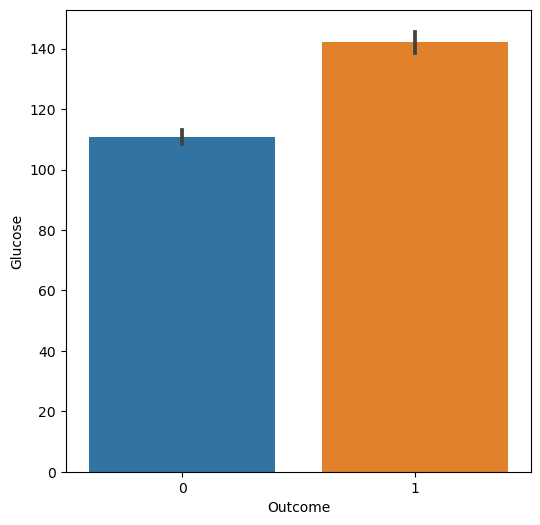

In [28]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='Glucose', data=df)
plt.show()

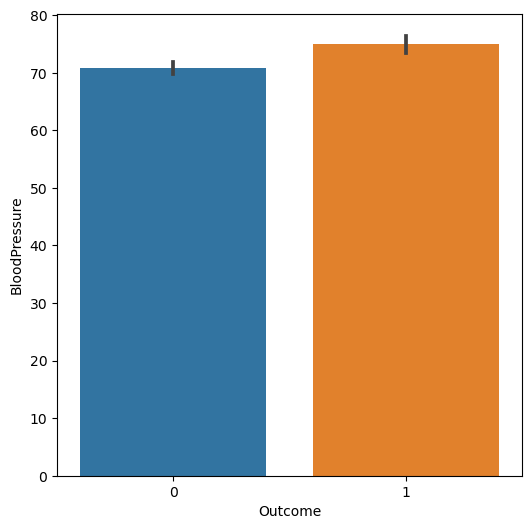

In [29]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='BloodPressure', data=df)
plt.show()

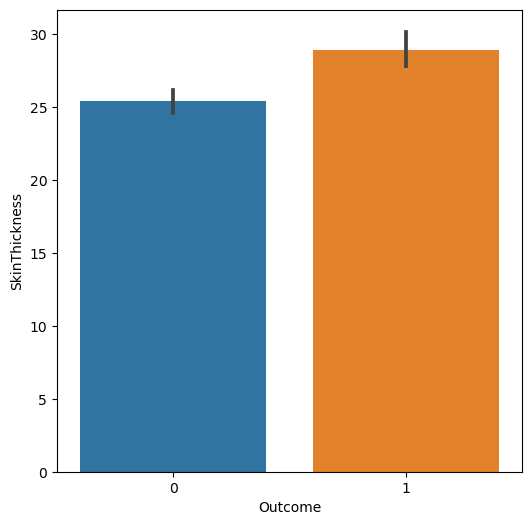

In [30]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='SkinThickness', data=df)
plt.show()

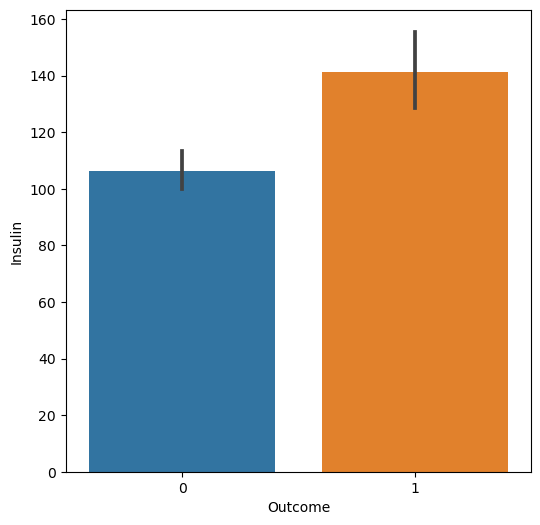

In [31]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='Insulin', data=df)
plt.show()

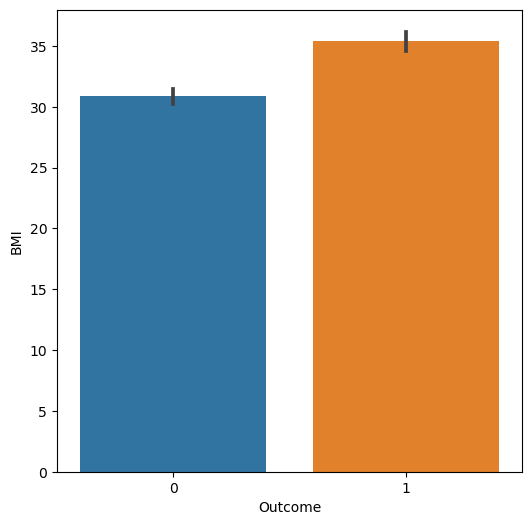

In [32]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='BMI', data=df)
plt.show()

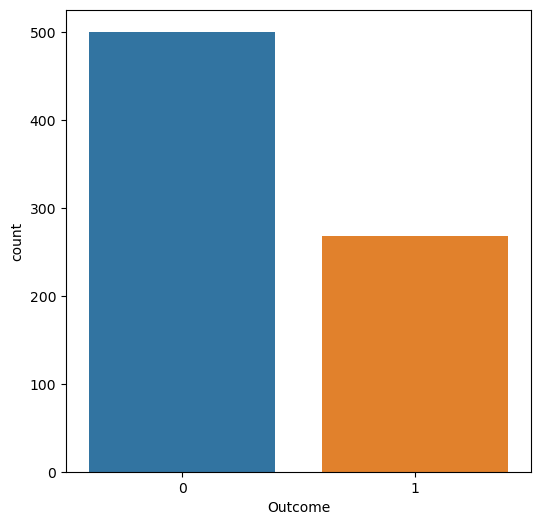

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outcome', data=df)
plt.show()

In [34]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 0, 'Insulin')

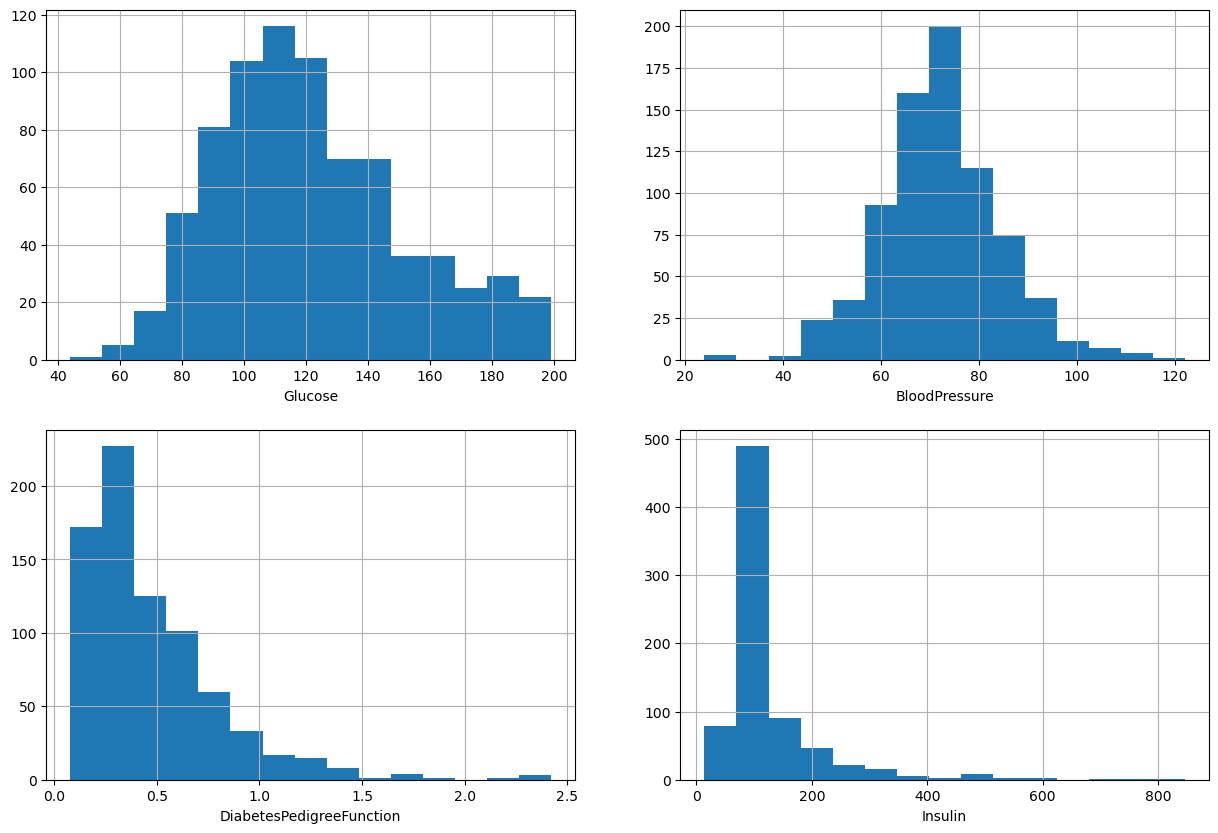

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df['Glucose'].hist(bins=15)
fig.set_xlabel('Glucose')

plt.subplot(2, 2, 2)
fig = df['BloodPressure'].hist(bins=15)
fig.set_xlabel('BloodPressure')

plt.subplot(2, 2, 3)
fig = df['DiabetesPedigreeFunction'].hist(bins=15)
fig.set_xlabel('DiabetesPedigreeFunction')

plt.subplot(2, 2, 4)
fig = df['Insulin'].hist(bins=15)
fig.set_xlabel('Insulin')

Text(0.5, 0, 'BMI')

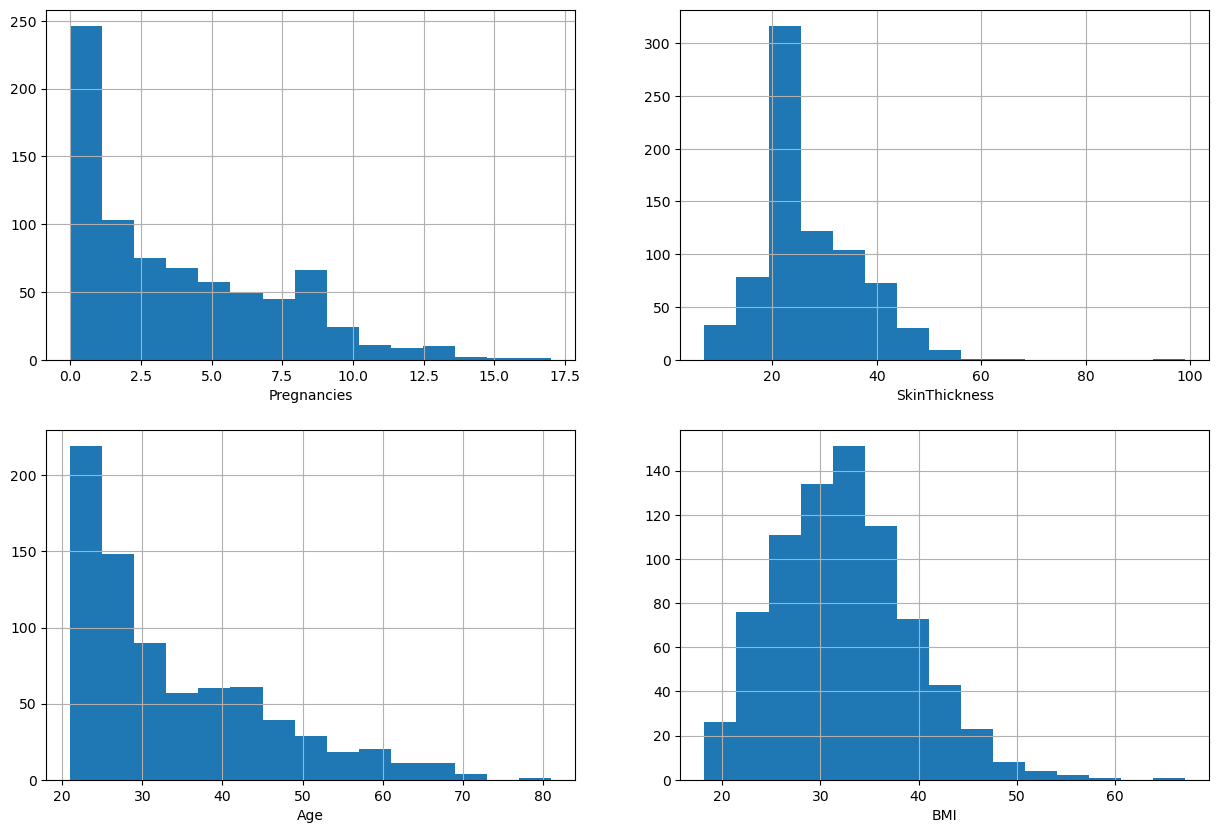

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df['Pregnancies'].hist(bins=15)
fig.set_xlabel('Pregnancies')

plt.subplot(2, 2, 2)
fig = df['SkinThickness'].hist(bins=15)
fig.set_xlabel('SkinThickness')

plt.subplot(2, 2, 3)
fig = df['Age'].hist(bins=15)
fig.set_xlabel('Age')

plt.subplot(2, 2, 4)
fig = df['BMI'].hist(bins=15)
fig.set_xlabel('BMI')

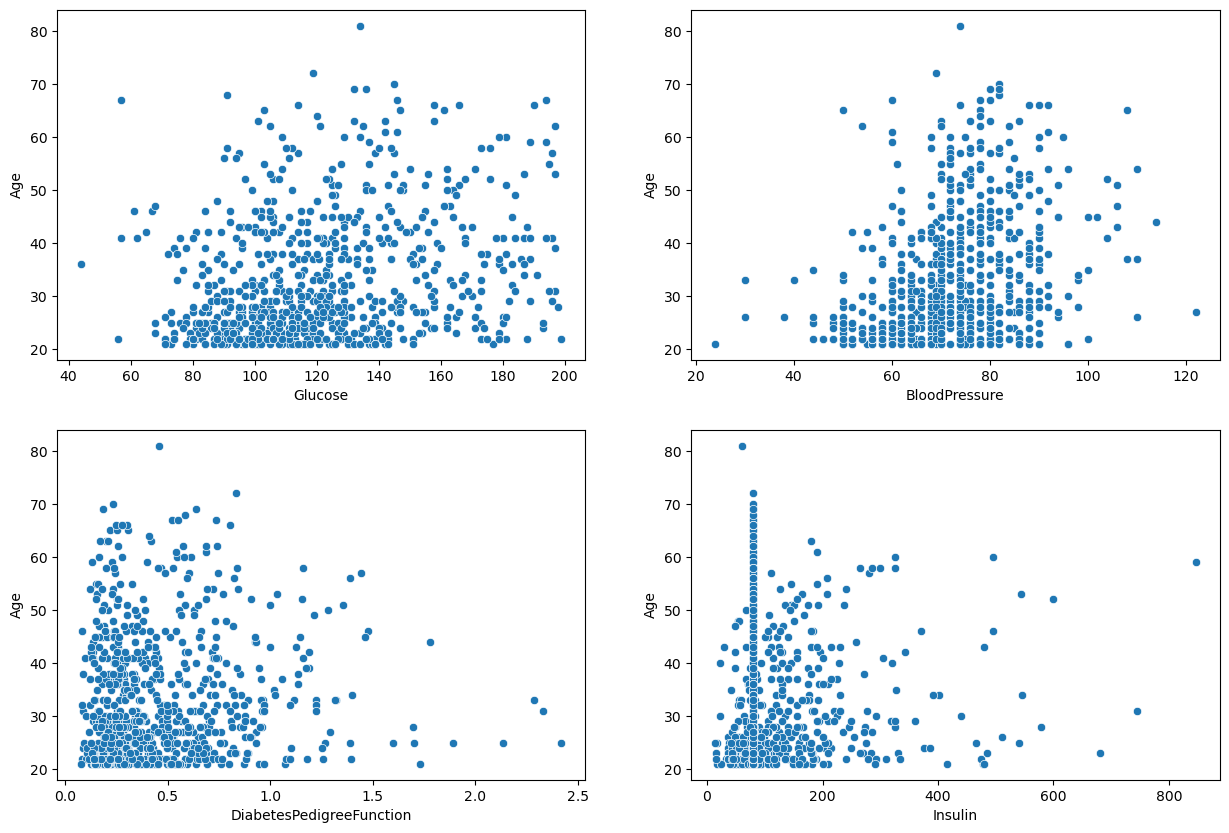

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.scatterplot(x='Glucose', y='Age', data=df)

plt.subplot(2, 2, 2)
fig = sns.scatterplot(x='BloodPressure', y='Age', data=df)

plt.subplot(2, 2, 3)
fig = sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', data=df)

plt.subplot(2, 2, 4)
fig = sns.scatterplot(x='Insulin', y='Age', data=df)

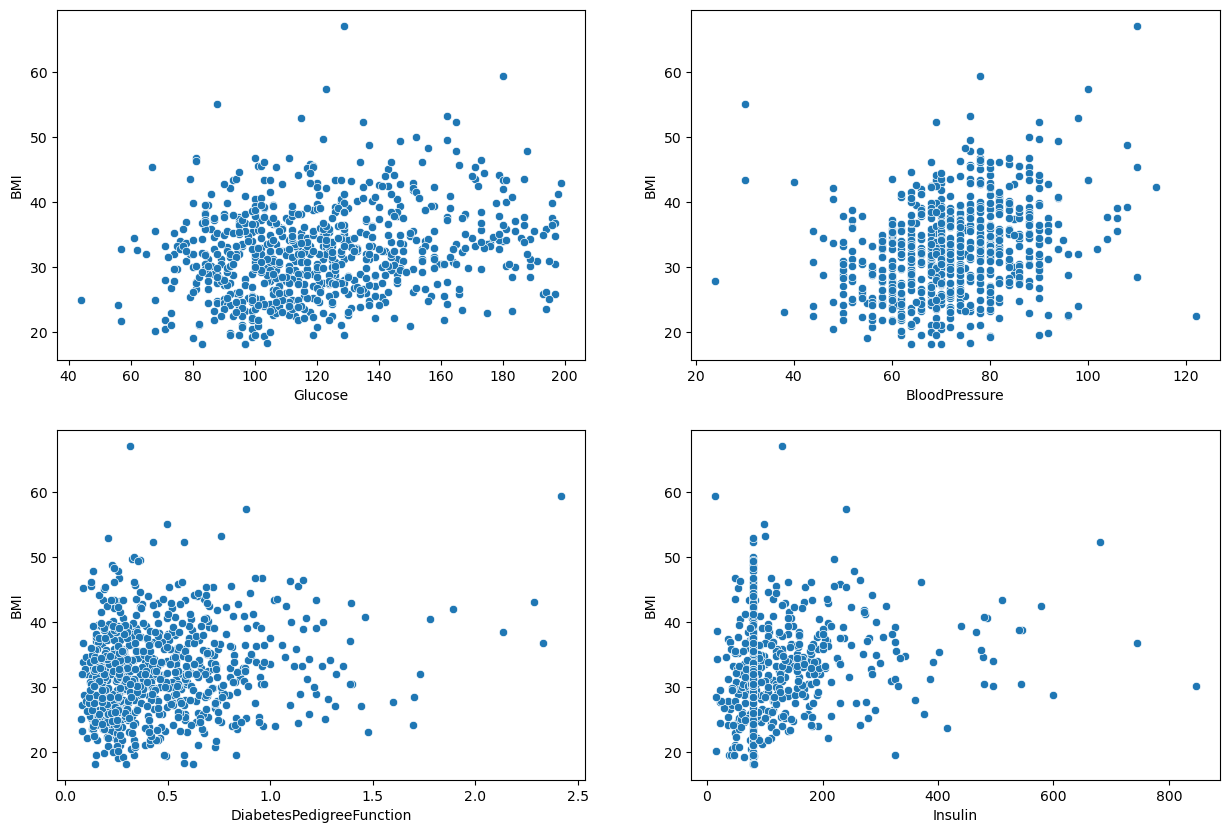

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.scatterplot(x='Glucose', y='BMI', data=df)

plt.subplot(2, 2, 2)
fig = sns.scatterplot(x='BloodPressure', y='BMI', data=df)

plt.subplot(2, 2, 3)
fig = sns.scatterplot(x='DiabetesPedigreeFunction', y='BMI', data=df)

plt.subplot(2, 2, 4)
fig = sns.scatterplot(x='Insulin', y='BMI', data=df)

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

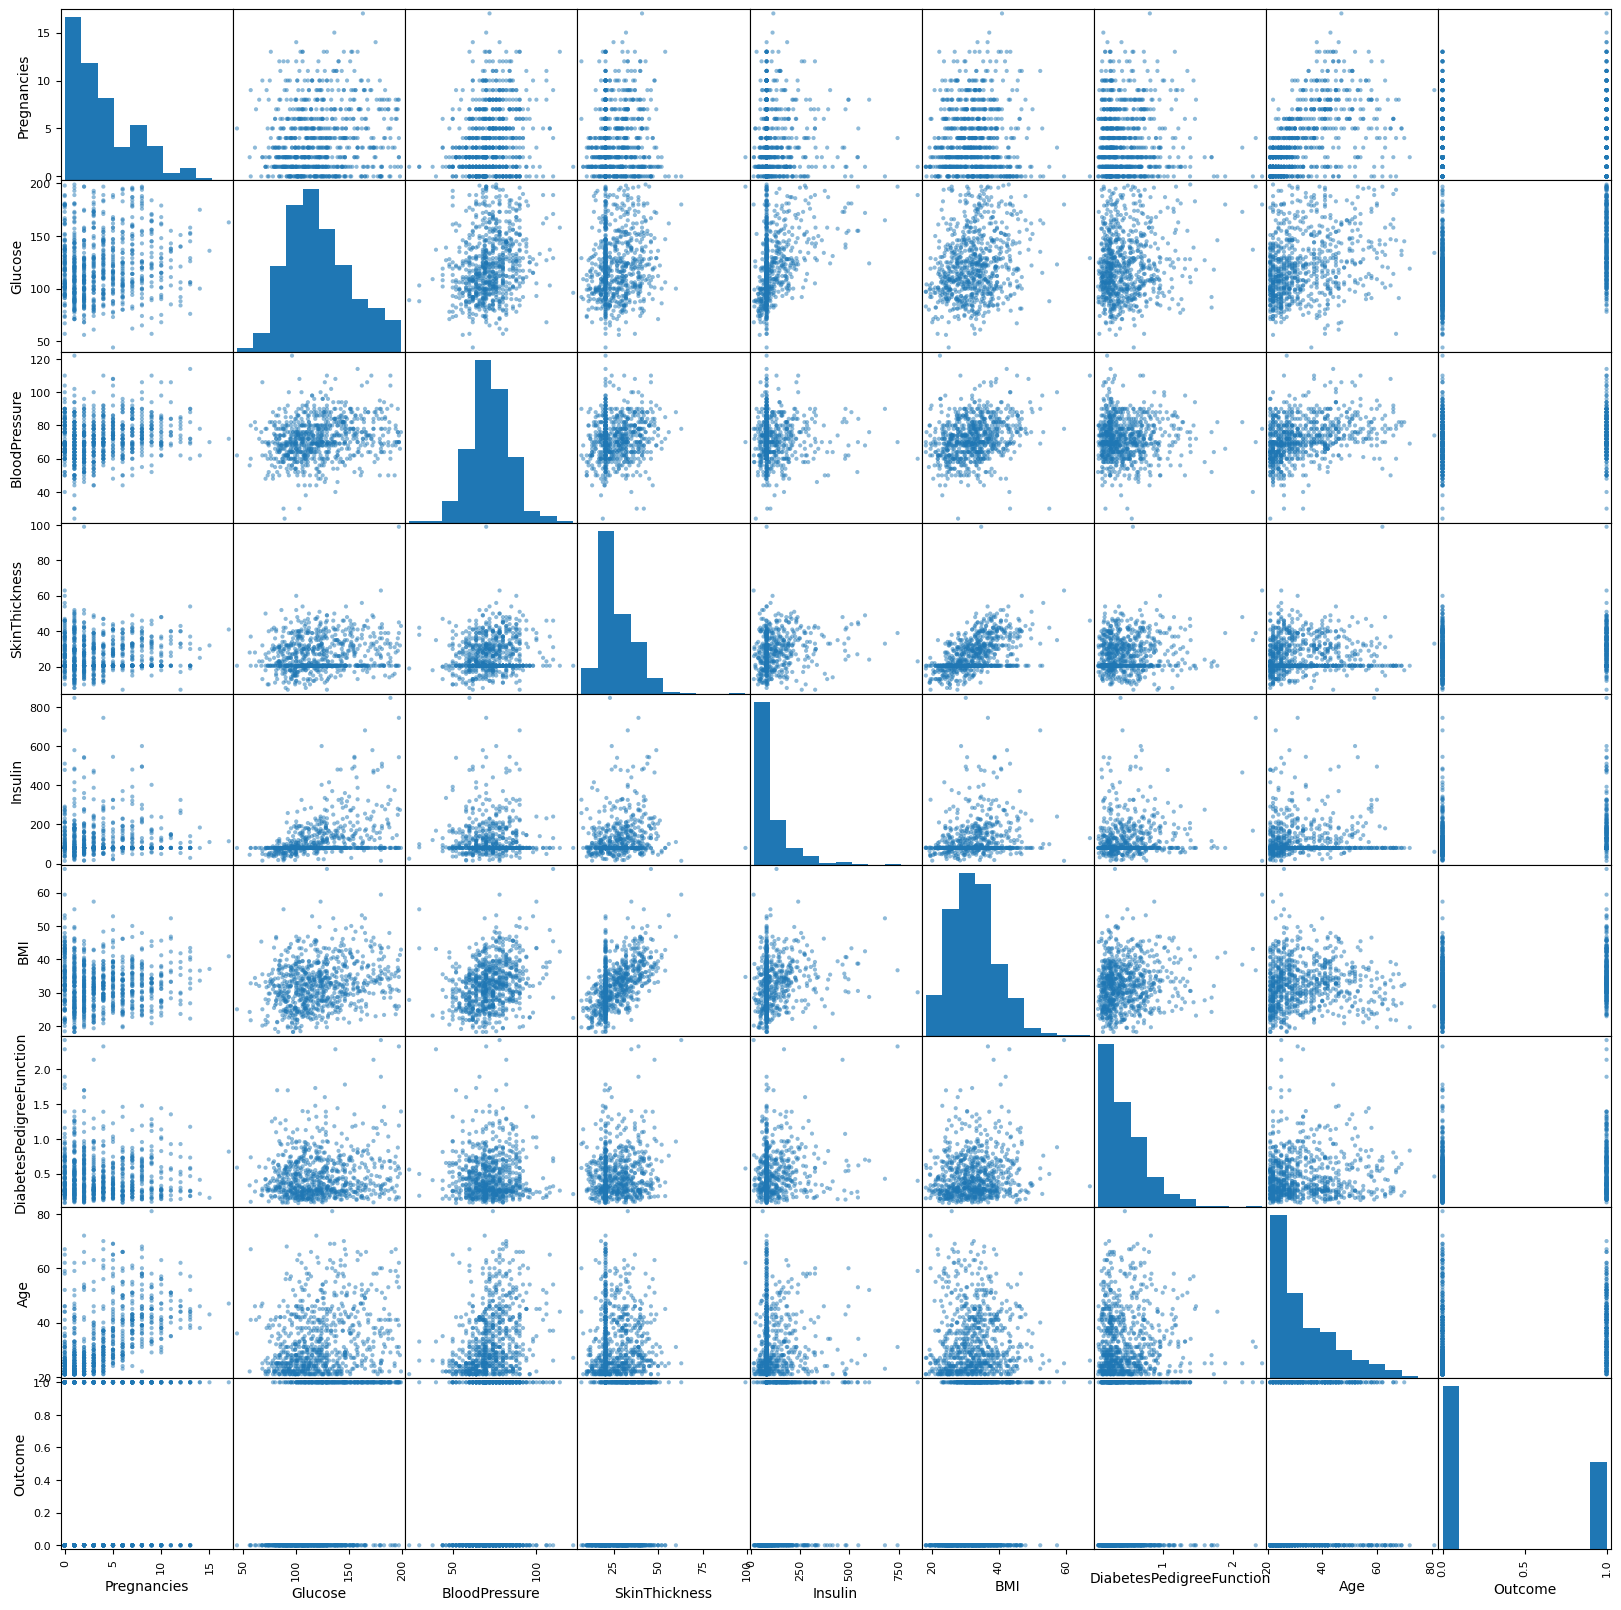

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

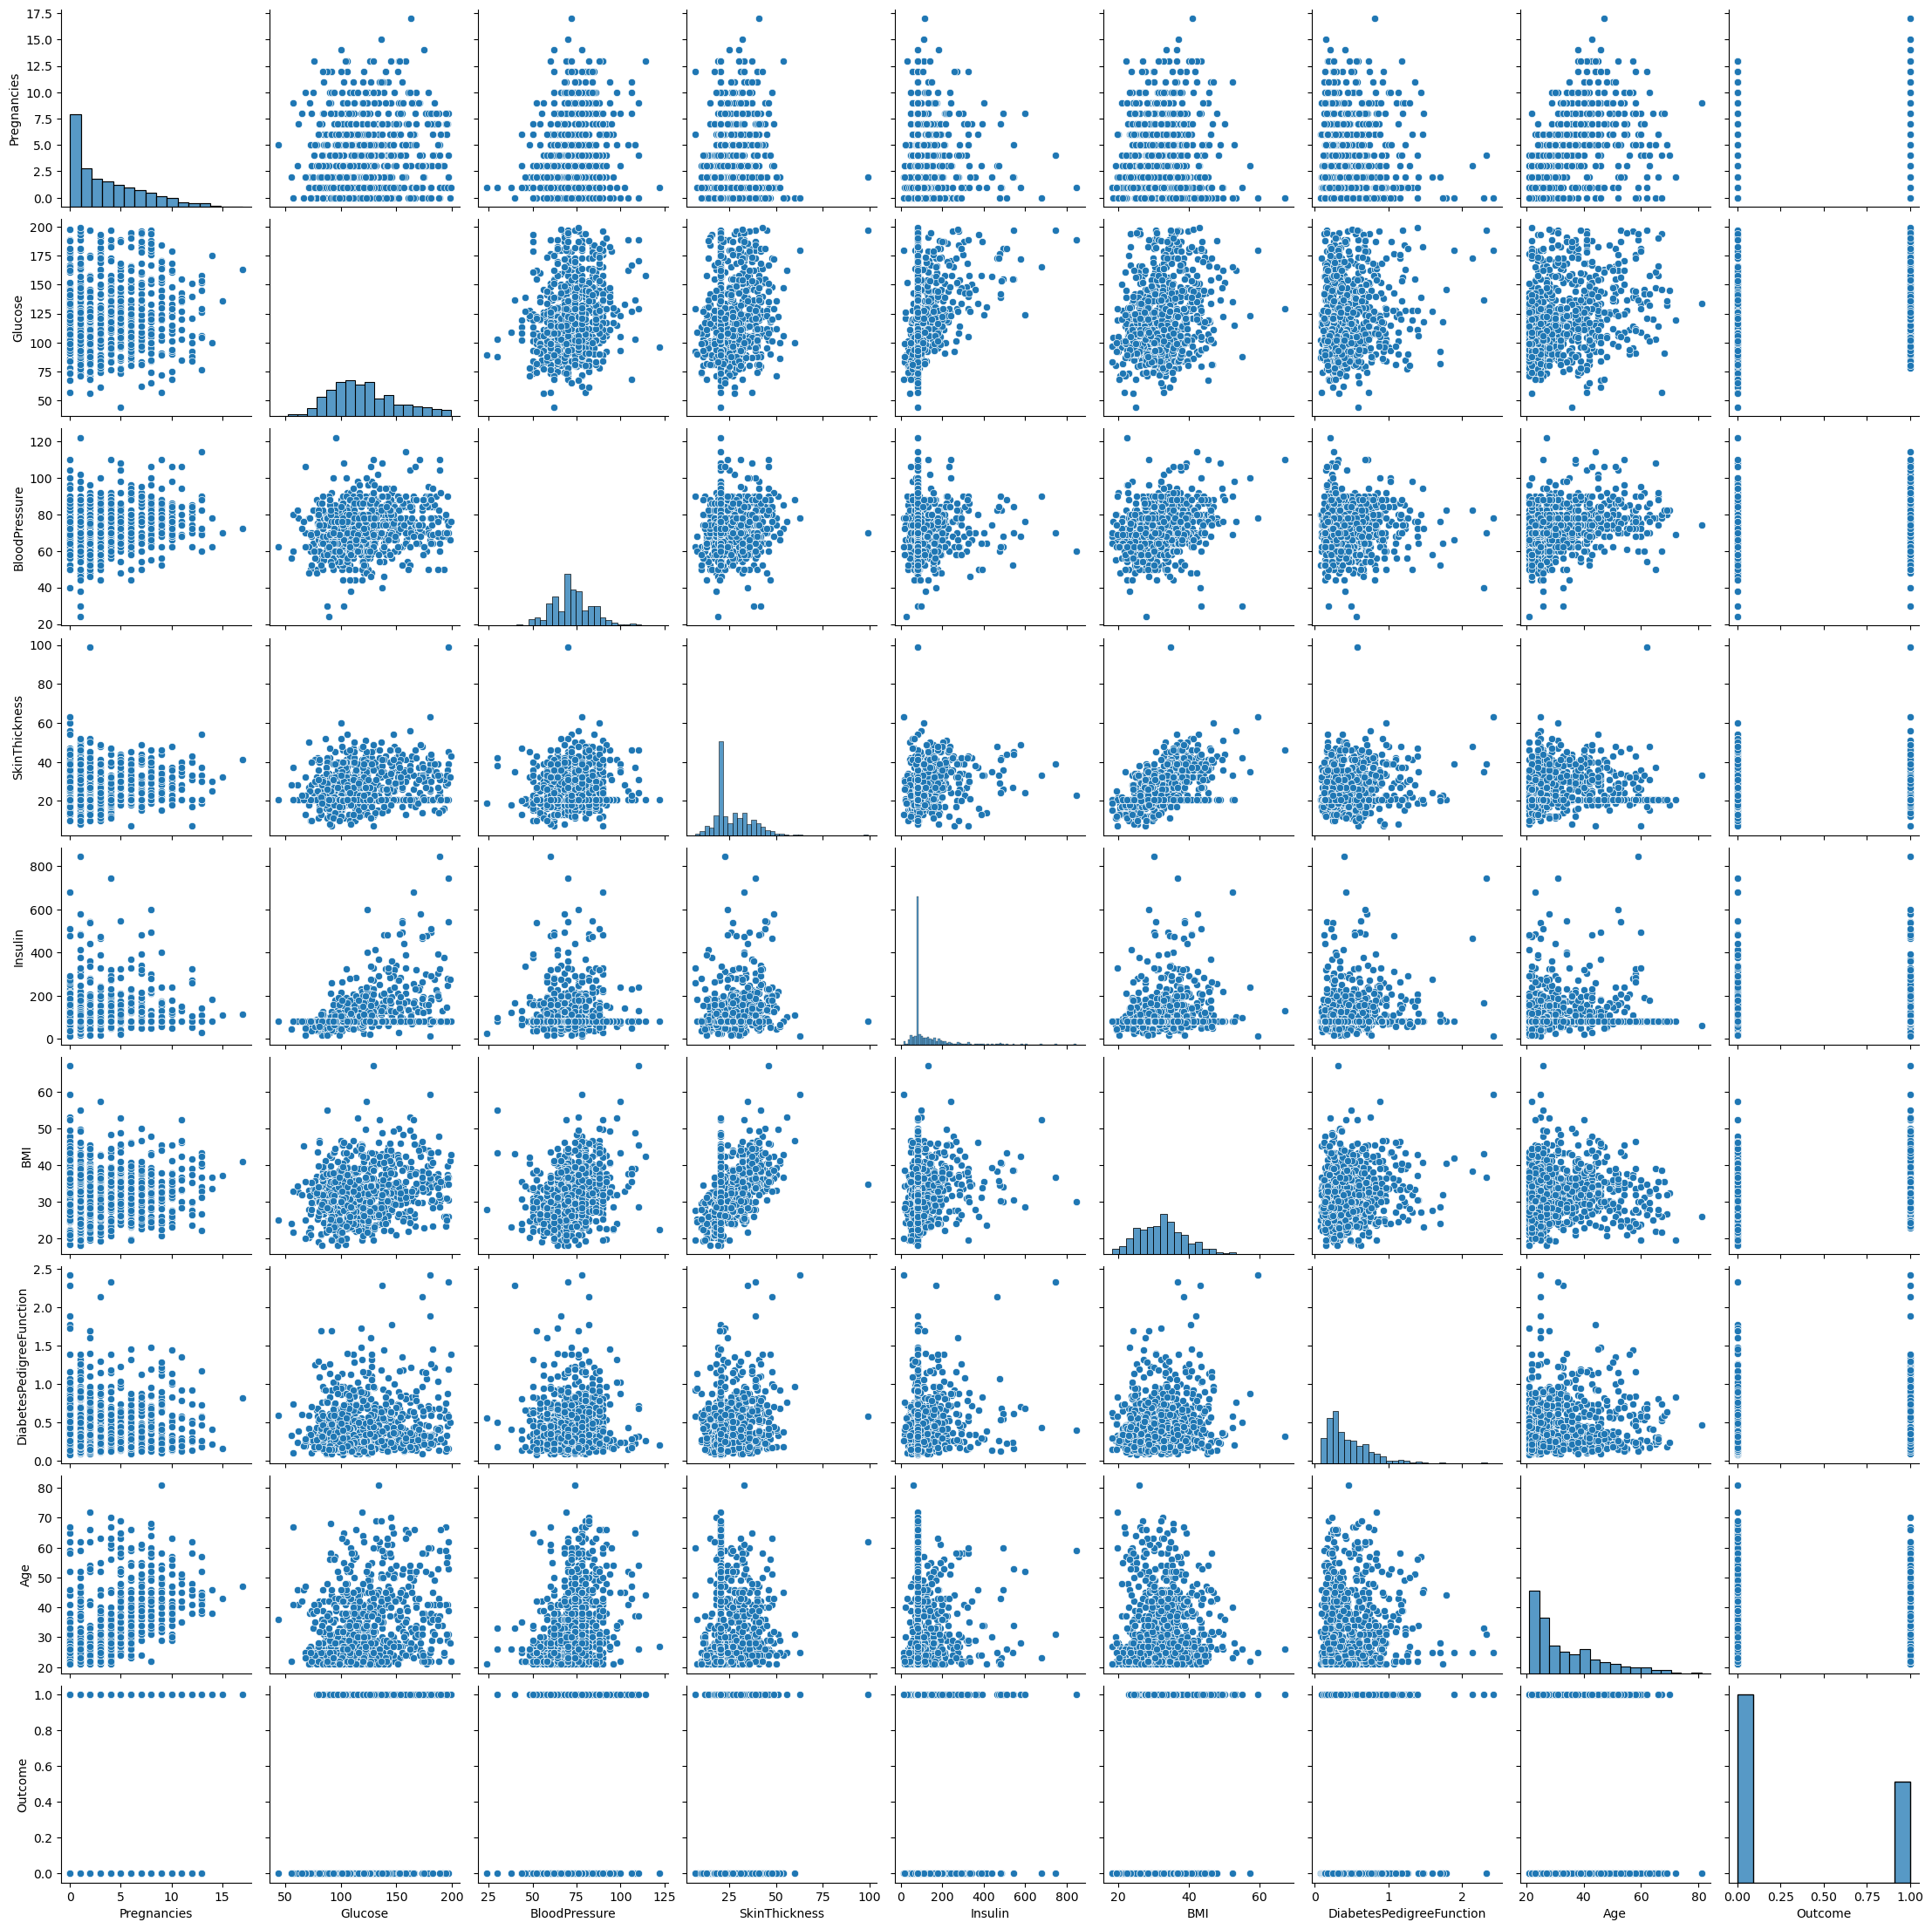

In [40]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

### Checking for Correlation between variables

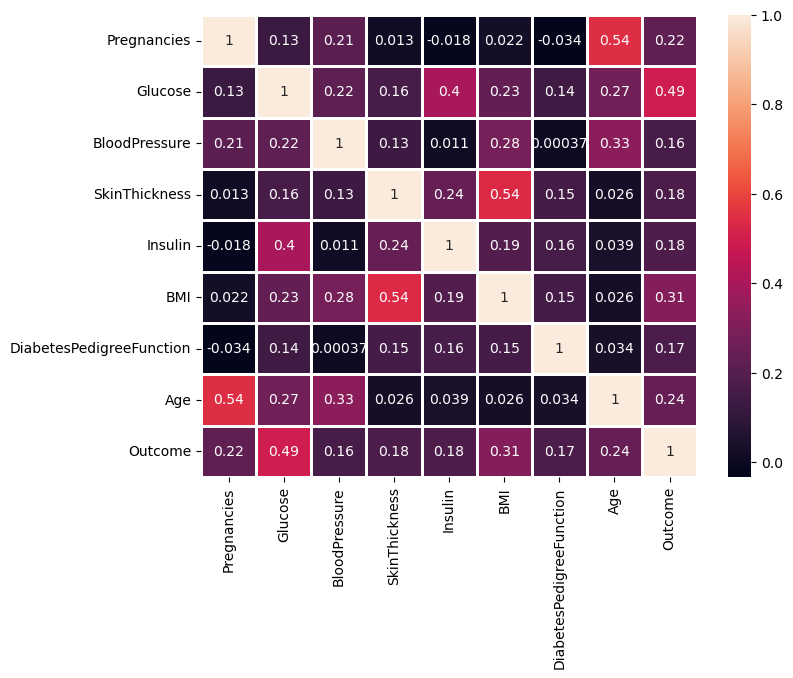

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linewidths=2)
plt.show()

### Splitting the Dataframe into X and Y

In [42]:
target_name = 'Outcome'

X = df.drop(target_name, axis = 1)
Y = df[target_name]

In [43]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [44]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [45]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54


In [46]:
Y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

### Applying Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(SSX,Y,test_size=0.2,random_state=7)

In [49]:
X_train.shape,Y_train.shape

((614, 8), (614,))

In [50]:
X_test.shape,Y_test.shape

((154, 8), (154,))

## Building the Classification Algorithms

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

### KNeighborsClassifier (KNN)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

### Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

## Making Predictions

### Making Predictions on Test Set using Logistic Regression

In [56]:
X_test.shape

(154, 8)

In [57]:
lr_pred = lr.predict(X_test)

In [58]:
lr_pred.shape

(154,)

### Making Predictions on Test Set using KNN

In [59]:
X_test.shape

(154, 8)

In [60]:
knn_pred = knn.predict(X_test)

In [61]:
knn_pred.shape

(154,)

### Making Predictions on Test Set using Naive Bayes

In [62]:
X_test.shape

(154, 8)

In [63]:
nb_pred = nb.predict(X_test)

In [64]:
nb_pred.shape

(154,)

### Making Predictions on Test Set using Decision Tree

In [65]:
X_test.shape

(154, 8)

In [66]:
dt_pred = dt.predict(X_test)

In [67]:
dt_pred.shape

(154,)

### Making Predictions on Test Set using Random Forest

In [68]:
X_test.shape

(154, 8)

In [69]:
rf_pred = rf.predict(X_test)

In [70]:
rf_pred.shape

(154,)

## Model Evaluation

### Train Score & Test Score

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
print("Train Accuracy of Logistic Regression: ", lr.score(X_train, Y_train)*100)
print("Accuracy (Test) Score of Logistic Regression: ", lr.score(X_test, Y_test)*100)
print("Accuracy (Test) Score of Logistic Regression: ", accuracy_score(Y_test, lr_pred)*100)

Train Accuracy of Logistic Regression:  77.36156351791531
Accuracy (Test) Score of Logistic Regression:  77.27272727272727
Accuracy (Test) Score of Logistic Regression:  77.27272727272727


In [73]:
print("Train Accuracy of KNN: ", knn.score(X_train, Y_train)*100)
print("Accuracy (Test) Score of KNN: ", knn.score(X_test, Y_test)*100)
print("Accuracy (Test) Score of KNN: ", accuracy_score(Y_test, knn_pred)*100)

Train Accuracy of KNN:  81.10749185667753
Accuracy (Test) Score of KNN:  74.67532467532467
Accuracy (Test) Score of KNN:  74.67532467532467


In [74]:
print("Train Accuracy of Naive Bayes: ", nb.score(X_train, Y_train)*100)
print("Accuracy (Test) Score of Naive Bayes: ", nb.score(X_test, Y_test)*100)
print("Accuracy (Test) Score of Naive Bayes: ", accuracy_score(Y_test, nb_pred)*100)

Train Accuracy of Naive Bayes:  74.2671009771987
Accuracy (Test) Score of Naive Bayes:  74.02597402597402
Accuracy (Test) Score of Naive Bayes:  74.02597402597402


In [75]:
print("Train Accuracy of Decision Tree: ", dt.score(X_train, Y_train)*100)
print("Accuracy (Test) Score of Decision Tree: ", dt.score(X_test, Y_test)*100)
print("Accuracy (Test) Score of Decision Tree: ", accuracy_score(Y_test, dt_pred)*100)

Train Accuracy of Decision Tree:  77.52442996742671
Accuracy (Test) Score of Decision Tree:  77.92207792207793
Accuracy (Test) Score of Decision Tree:  77.92207792207793


In [76]:
print("Train Accuracy of Random Forest: ", lr.score(X_train, Y_train)*100)
print("Accuracy (Test) Score of Random Forest: ", lr.score(X_test, Y_test)*100)
print("Accuracy (Test) Score of Random Forest: ", accuracy_score(Y_test, lr_pred)*100)

Train Accuracy of Random Forest:  77.36156351791531
Accuracy (Test) Score of Random Forest:  77.27272727272727
Accuracy (Test) Score of Random Forest:  77.27272727272727


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [78]:
pipeline_lr = Pipeline([('scaler1', StandardScaler()),
                       ('lr_classifier', LogisticRegression())])

pipeline_knn = Pipeline([('scaler2', StandardScaler()),
                       ('knn_classifier', KNeighborsClassifier())])

pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(max_depth=3))])

pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(max_depth=3))])


In [79]:
pipelines = [pipeline_lr, pipeline_knn, pipeline_dt, pipeline_rf]

In [80]:
pipelines

[Pipeline(steps=[('scaler1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier(max_depth=3))]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))])]

In [81]:
for pipe in pipelines:
    pipe.fit(X_train, Y_train)

In [82]:
pipe_dict = {0: 'LR', 1: 'KNN', 2: 'DT', 3: 'RF'}

In [83]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'DT', 3: 'RF'}

In [84]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy : {}".format(pipe_dict[i],round(model.score(X_test,Y_test)*100,2)))

LR Test Accuracy : 77.27
KNN Test Accuracy : 74.68
DT Test Accuracy : 77.92
RF Test Accuracy : 75.97


In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
X = diab_data.drop('Outcome', axis = 1)
Y = diab_data['Outcome']

In [87]:
rf = RandomForestClassifier(max_depth=3)

In [88]:
rf.fit(X,Y)

RandomForestClassifier(max_depth=3)

In [89]:
diab_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [90]:
new_data = pd.DataFrame({'Pregnancies':6, 'Glucose':148.0, 'BloodPressure':72.0, 'SkinThickness':35.0, 'Insulin':79.799479,
       'BMI':33.6, 'DiabetesPedigreeFunction':0.627, 'Age':50}, index=[0])

In [91]:
p = rf.predict(new_data)

In [92]:
if p[0] == 0:
    print("The patient is \'Diabetic\'")
else:
    print("The patient is \'Non-Diabetic\'")

The patient is 'Non-Diabetic'


In [93]:
import joblib

In [94]:
joblib.dump(rf, 'joblib_diabetes_model')

['joblib_diabetes_model']

In [95]:
model = joblib.load('joblib_diabetes_model')

In [96]:
val = model.predict(new_data)

In [97]:
if val[0] == 0:
    print("The patient is \'Diabetic\'")
else:
    print("The patient is \'Non-Diabetic\'")

The patient is 'Non-Diabetic'
